3D梯度下降算法比較視覺化
選擇目標函數:
1. Rosenbrock 函數
2. Beale 函數
使用 Rosenbrock 函數

起始點: (-1.50, 2.50)
正在生成比較圖表...


/home/leonjye/pythonprojects/MachineLearning2025/.venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2791: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
/tmp/ipykernel_16210/1207165360.py:26: RuntimeWarning: overflow encountered in scalar power
  dx = -2*(a - x) - 4*b*x*(y - x**2)
/tmp/ipykernel_16210/1207165360.py:27: RuntimeWarning: overflow encountered in scalar power
  dy = 2*b*(y - x**2)
/tmp/ipykernel_16210/1207165360.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  dx = -2*(a - x) - 4*b*x*(y - x**2)
/tmp/ipykernel_16210/1207165360.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  dy = 2*b*(y - x**2)
/tmp/ipykernel_16210/1207165360.py:21: RuntimeWarning: overflow encountered in scalar power
  return (a - x)**2 + b * (y - x**2)**2
/tmp/ipykernel_16210/1207165360.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  return (a - x)**2 + b * (y - x**2)**2
/home/leonjye/pythonprojects/MachineLearning2025

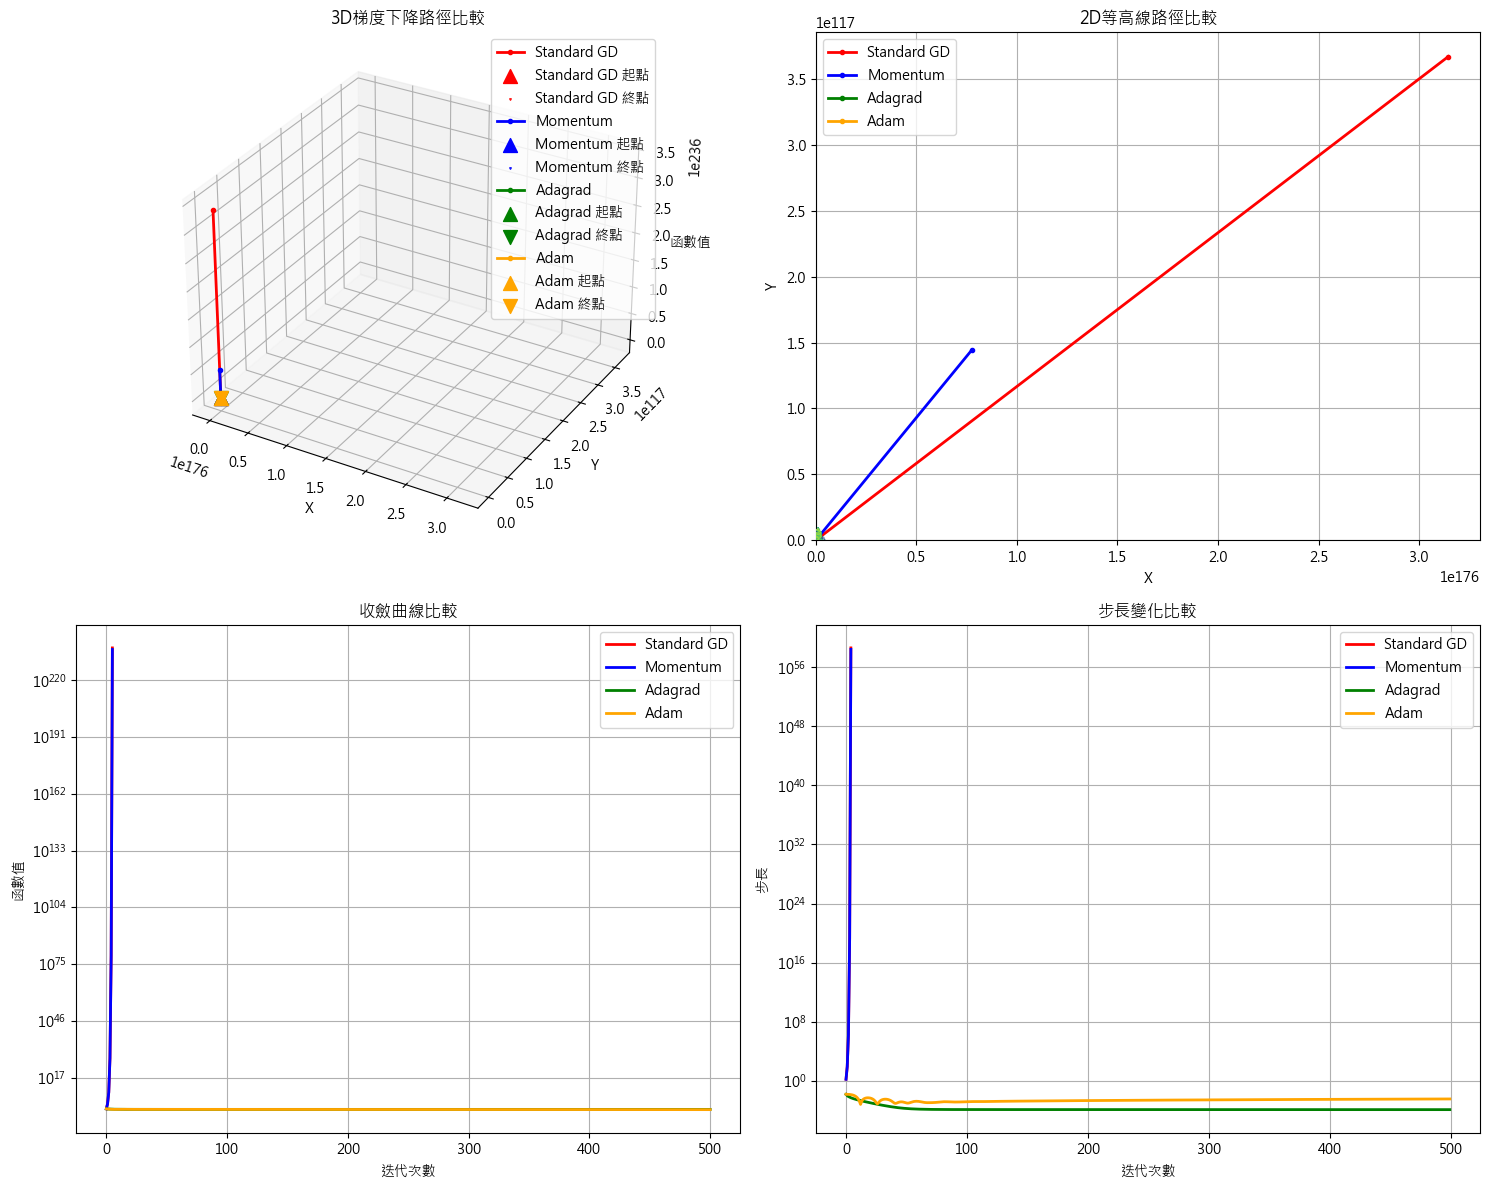


算法性能統計:
------------------------------------------------------------
算法              迭代次數       最終函數值           收斂性       
------------------------------------------------------------
Standard GD     500        nan             否         
Momentum        500        nan             否         
Adagrad         500        6.468144        否         
Adam            500        4.829461        否         
正在生成動畫...


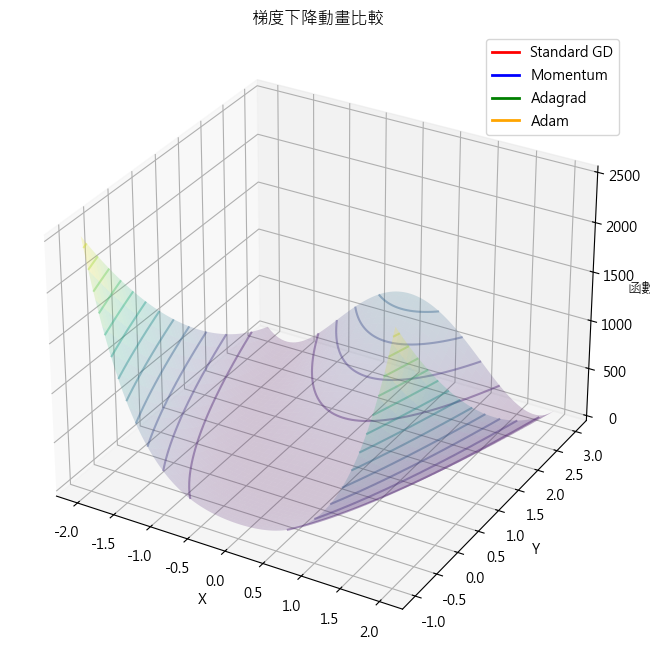

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

%matplotlib inline
# 設定中文字體
font_path = 'msjh.ttc'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

class OptimizationFunction:
    """定義優化目標函數"""
    
    @staticmethod
    def rosenbrock(x, y, a=1, b=100):
        """Rosenbrock函數 - 經典的非凸優化測試函數"""
        return (a - x)**2 + b * (y - x**2)**2
    
    @staticmethod
    def rosenbrock_gradient(x, y, a=1, b=100):
        """Rosenbrock函數的梯度"""
        dx = -2*(a - x) - 4*b*x*(y - x**2)
        dy = 2*b*(y - x**2)
        return np.array([dx, dy])
    
    @staticmethod
    def beale(x, y):
        """Beale函數 - 另一個經典測試函數"""
        term1 = (1.5 - x + x*y)**2
        term2 = (2.25 - x + x*y**2)**2
        term3 = (2.625 - x + x*y**3)**2
        return term1 + term2 + term3
    
    @staticmethod
    def beale_gradient(x, y):
        """Beale函數的梯度"""
        dx = (2*(1.5 - x + x*y)*(-1 + y) + 
              2*(2.25 - x + x*y**2)*(-1 + y**2) + 
              2*(2.625 - x + x*y**3)*(-1 + y**3))
        dy = (2*(1.5 - x + x*y)*x + 
              2*(2.25 - x + x*y**2)*2*x*y + 
              2*(2.625 - x + x*y**3)*3*x*y**2)
        return np.array([dx, dy])

class GradientDescentOptimizer:
    """實現各種梯度下降算法"""
    
    def __init__(self, func, grad_func, learning_rate=0.01, max_iterations=1000):
        self.func = func
        self.grad_func = grad_func
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
    
    def standard_gd(self, start_point):
        """標準梯度下降"""
        path = [start_point.copy()]
        point = start_point.copy()
        
        for i in range(self.max_iterations):
            grad = self.grad_func(point[0], point[1])
            point -= self.learning_rate * grad
            path.append(point.copy())
            
            # 收斂條件
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)
    
    def momentum_gd(self, start_point, momentum=0.9):
        """動量梯度下降"""
        path = [start_point.copy()]
        point = start_point.copy()
        velocity = np.zeros_like(point)
        
        for i in range(self.max_iterations):
            grad = self.grad_func(point[0], point[1])
            velocity = momentum * velocity - self.learning_rate * grad
            point += velocity
            path.append(point.copy())
            
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)
    
    def adagrad(self, start_point, eps=1e-8):
        """Adagrad算法"""
        path = [start_point.copy()]
        point = start_point.copy()
        sum_squared_grads = np.zeros_like(point)
        
        for i in range(self.max_iterations):
            grad = self.grad_func(point[0], point[1])
            sum_squared_grads += grad**2
            adapted_lr = self.learning_rate / (np.sqrt(sum_squared_grads) + eps)
            point -= adapted_lr * grad
            path.append(point.copy())
            
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)
    
    def adam(self, start_point, beta1=0.9, beta2=0.999, eps=1e-8):
        """Adam算法"""
        path = [start_point.copy()]
        point = start_point.copy()
        m = np.zeros_like(point)  # 一階矩估計
        v = np.zeros_like(point)  # 二階矩估計
        
        for i in range(1, self.max_iterations + 1):
            grad = self.grad_func(point[0], point[1])
            
            # 更新偏差修正的一階和二階矩估計
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * grad**2
            
            # 偏差修正
            m_hat = m / (1 - beta1**i)
            v_hat = v / (1 - beta2**i)
            
            # 參數更新
            point -= self.learning_rate * m_hat / (np.sqrt(v_hat) + eps)
            path.append(point.copy())
            
            if np.linalg.norm(grad) < 1e-6:
                break
                
        return np.array(path)

class GradientDescentVisualizer:
    """3D視覺化梯度下降過程"""
    
    def __init__(self, func, grad_func, x_range=(-2, 2), y_range=(-1, 3), resolution=100):
        self.func = func
        self.grad_func = grad_func
        self.x_range = x_range
        self.y_range = y_range
        self.resolution = resolution
        
        # 創建網格
        self.x = np.linspace(x_range[0], x_range[1], resolution)
        self.y = np.linspace(y_range[0], y_range[1], resolution)
        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.Z = self.func(self.X, self.Y)
        
        # 設置優化器
        self.optimizer = GradientDescentOptimizer(func, grad_func, learning_rate=0.01, max_iterations=500)
    
    def create_static_comparison(self, start_point=np.array([-1.5, 2.5])):
        """創建靜態比較圖"""
        # 運行不同算法
        paths = {
            'Standard GD': self.optimizer.standard_gd(start_point),
            'Momentum': self.optimizer.momentum_gd(start_point),
            'Adagrad': self.optimizer.adagrad(start_point),
            'Adam': self.optimizer.adam(start_point)
        }
        
        # 創建3D圖
        fig = plt.figure(figsize=(15, 12))
        
        # 主要的3D視圖
        ax1 = fig.add_subplot(221, projection='3d')
        
        # 繪製表面
        surf = ax1.plot_surface(self.X, self.Y, self.Z, alpha=0.3, cmap='viridis')
        
        # 繪製等高線投影
        ax1.contour(self.X, self.Y, self.Z, levels=20, alpha=0.6, cmap='viridis')
        
        # 定義顏色
        colors = ['red', 'blue', 'green', 'orange']
        
        # 繪製優化路徑
        for i, (name, path) in enumerate(paths.items()):
            if len(path) > 0:
                path_z = [self.func(p[0], p[1]) for p in path]
                ax1.plot(path[:, 0], path[:, 1], path_z, 
                        color=colors[i], linewidth=2, marker='o', markersize=3, label=name)
                
                # 標記起點和終點
                ax1.scatter([path[0, 0]], [path[0, 1]], [path_z[0]], 
                           color=colors[i], s=100, marker='^', label=f'{name} 起點')
                ax1.scatter([path[-1, 0]], [path[-1, 1]], [path_z[-1]], 
                           color=colors[i], s=100, marker='v', label=f'{name} 終點')
        
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('函數值')
        ax1.set_title('3D梯度下降路徑比較')
        ax1.legend()
        
        # 2D等高線視圖
        ax2 = fig.add_subplot(222)
        contour = ax2.contour(self.X, self.Y, self.Z, levels=30, cmap='viridis')
        ax2.clabel(contour, inline=True, fontsize=8)
        
        for i, (name, path) in enumerate(paths.items()):
            if len(path) > 0:
                ax2.plot(path[:, 0], path[:, 1], color=colors[i], 
                        linewidth=2, marker='o', markersize=3, label=name)
                ax2.scatter(path[0, 0], path[0, 1], color=colors[i], s=100, marker='^')
                ax2.scatter(path[-1, 0], path[-1, 1], color=colors[i], s=100, marker='v')
        
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_title('2D等高線路徑比較')
        ax2.legend()
        ax2.grid(True)
        
        # 收斂曲線
        ax3 = fig.add_subplot(223)
        for i, (name, path) in enumerate(paths.items()):
            if len(path) > 0:
                convergence = [self.func(p[0], p[1]) for p in path]
                ax3.plot(convergence, color=colors[i], linewidth=2, label=name)
        
        ax3.set_xlabel('迭代次數')
        ax3.set_ylabel('函數值')
        ax3.set_title('收斂曲線比較')
        ax3.set_yscale('log')
        ax3.legend()
        ax3.grid(True)
        
        # 步長變化
        ax4 = fig.add_subplot(224)
        for i, (name, path) in enumerate(paths.items()):
            if len(path) > 1:
                step_sizes = []
                for j in range(1, len(path)):
                    step_size = np.linalg.norm(path[j] - path[j-1])
                    step_sizes.append(step_size)
                ax4.plot(step_sizes, color=colors[i], linewidth=2, label=name)
        
        ax4.set_xlabel('迭代次數')
        ax4.set_ylabel('步長')
        ax4.set_title('步長變化比較')
        ax4.set_yscale('log')
        ax4.legend()
        ax4.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # 打印統計信息
        print("\n算法性能統計:")
        print("-" * 60)
        print(f"{'算法':<15} {'迭代次數':<10} {'最終函數值':<15} {'收斂性':<10}")
        print("-" * 60)
        
        for name, path in paths.items():
            if len(path) > 0:
                final_value = self.func(path[-1, 0], path[-1, 1])
                converged = "是" if final_value < 1e-3 else "否"
                print(f"{name:<15} {len(path)-1:<10} {final_value:<15.6f} {converged:<10}")
    
    def create_animated_comparison(self, start_point=np.array([-1.5, 2.5])):
        """創建動畫比較"""
        # 運行算法
        paths = {
            'Standard GD': self.optimizer.standard_gd(start_point),
            'Momentum': self.optimizer.momentum_gd(start_point),
            'Adagrad': self.optimizer.adagrad(start_point),
            'Adam': self.optimizer.adam(start_point)
        }
        
        # 找出最長路徑長度
        max_len = max(len(path) for path in paths.values())
        
        # 創建動畫圖形
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # 繪製表面
        surf = ax.plot_surface(self.X, self.Y, self.Z, alpha=0.2, cmap='viridis')
        ax.contour(self.X, self.Y, self.Z, levels=15, alpha=0.4)
        
        # 初始化線條和點
        colors = ['red', 'blue', 'green', 'orange']
        lines = {}
        points = {}
        
        for i, name in enumerate(paths.keys()):
            line, = ax.plot([], [], [], color=colors[i], linewidth=2, label=name)
            point, = ax.plot([], [], [], color=colors[i], marker='o', markersize=8)
            lines[name] = line
            points[name] = point
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('函數值')
        ax.set_title('梯度下降動畫比較')
        ax.legend()
        
        def animate(frame):
            for name, path in paths.items():
                if frame < len(path):
                    # 更新路徑
                    print('更新路徑:', name, 'frame:', frame)
                    current_path = path[:frame+1]
                    path_z = [self.func(p[0], p[1]) for p in current_path]
                    lines[name].set_data_3d(current_path[:, 0], current_path[:, 1], path_z)
                    
                    # 更新當前點
                    if frame < len(path):
                        current_z = self.func(path[frame, 0], path[frame, 1])
                        points[name].set_data_3d([path[frame, 0]], [path[frame, 1]], [current_z])
            
            return list(lines.values()) + list(points.values())
        
        # 創建動畫
        anim = FuncAnimation(fig, animate, frames=max_len, interval=100, blit=False, repeat=True)
        
        plt.show()
        return anim

# 主程序
def main():
    print("3D梯度下降算法比較視覺化")
    print("=" * 50)
    
    # 選擇函數
    print("選擇目標函數:")
    print("1. Rosenbrock 函數")
    print("2. Beale 函數")
    
    choice = input("請輸入選擇 (1 或 2): ").strip()
    
    if choice == "2":
        func = OptimizationFunction.beale
        grad_func = OptimizationFunction.beale_gradient
        x_range = (-4.5, 4.5)
        y_range = (-4.5, 4.5)
        start_point = np.array([2.0, 2.0])
        print("使用 Beale 函數")
    else:
        func = OptimizationFunction.rosenbrock
        grad_func = OptimizationFunction.rosenbrock_gradient
        x_range = (-2, 2)
        y_range = (-1, 3)
        start_point = np.array([-1.5, 2.5])
        print("使用 Rosenbrock 函數")
    
    # 創建視覺化器
    visualizer = GradientDescentVisualizer(func, grad_func, x_range, y_range)
    
    print(f"\n起始點: ({start_point[0]:.2f}, {start_point[1]:.2f})")
    print("正在生成比較圖表...")
    
    # 創建靜態比較
    visualizer.create_static_comparison(start_point)
    
    # 詢問是否要看動畫
    show_animation = input("\n是否要顯示動畫? (y/n): ").strip().lower()
    if show_animation == 'y':
        print("正在生成動畫...")
        anim = visualizer.create_animated_comparison(start_point)

if __name__ == "__main__":
    main()